In [102]:
import matplotlib as plt
from matplotlib.pyplot import imshow
import numpy as np
from random import sample
import tensorflow.keras.datasets as datasets
from dnn_tf import dnn
import tensorflow as tf
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Parameters - To be defined by user
nClass = 10
nHidden = [256]
nInput = 784
layers = [nInput] + nHidden + [nClass]
limit = 0.0001
#Hyperparameters - To be tuned by the user
learning_rate = 0.01
nMiniBatch = 128
nIter = 10000
print("Layers: ", layers)
print("Learning Rate: ", learning_rate)
print("Number of MiniBatch: ", nMiniBatch)
print("Iterations: ", nIter)
layers[-1]

Layers:  [784, 256, 10]
Learning Rate:  0.01
Number of MiniBatch:  128
Iterations:  10000


10

In [3]:
#-------data input function-----------------------------#
def getDataset(name, nClass):
    if name=="mnist":
        dataset = datasets.mnist
    (x_train, y_train),(x_test, y_test) = dataset.load_data()     #downloading and loading the dataset
    #x_train, x_test = x_train / 255.0, x_test / 255.0             #normalizing the input data
    x_train_flat = x_train.reshape(x_train.shape[0],-1)         #making dataset suitable for input in Fully Connected layer
    x_test_flat = x_test.reshape(x_test.shape[0],-1)          #making dataset suitable for input in Fully Connected layer
    y_train_onehot = np.eye(nClass)[y_train]                    #converting to one hot vectors
    y_test_onehot = np.eye(nClass)[y_test]                     #converting to one hot vectors
    print(x_train_flat.shape)
    print(y_train_onehot.shape)
    x_train_batch = np.array_split(x_train_flat, int(60000/128))
    print(x_train_batch[2].shape)
    return x_train_flat,x_test_flat,y_train_onehot,y_test_onehot


In [4]:
x_train, x_test, y_train, y_test = getDataset("mnist", nClass)

(60000, 784)
(60000, 10)
(129, 784)


In [5]:
# x_train.T.shape
# a = np.random.randn(3,3)
# print(a)
# a.T[1]
# z = np.less_equal(a,0.5)
# z = (1-z)
# z = z * a
# print(z)
# def fn(z):
#     z[1]= z[1]**2
# fn(z)
# print(z)

In [6]:
def pi_membership_function(r,c,radius):
    norm = abs(r-c)
    if radius == 0:
        return np.zeros(norm.shape)
    else:
        for i in range(len(r)):
            if norm[i] <= radius and norm[i] >= radius/2:
                norm[i] = (2*((1-norm[i]/radius)**2))
            elif norm[i] < radius/2 and norm[i] >= 0:
                norm[i] = (1 - 2*((norm[i]/radius)**2))
            else:
                norm[i] = 0
    return norm
    

In [7]:
def fuzzifyDataset(x_train):
    fdenom = 2
    F_max = np.array([255]*784)
    F_min = np.array([0]*784)
#     F_max = np.ndarray.max(x_train, axis = 0)
#     F_min = np.ndarray.min(x_train, axis = 0)
    lambda_medium = 0.5*(F_max - F_min)
    c_medium = F_min + lambda_medium
#     print(c_medium)
    lambda_low = (1/fdenom)*(c_medium-F_min)
#     print(lambda_low)
    c_low = c_medium - 0.5 * lambda_low
#     print(c_low)
    lambda_high = (1/fdenom) * (F_max - c_medium)
#     print(lambda_high)
    c_high = c_medium + 0.5 * lambda_high
#     print(c_high)
    x_train = x_train.T
#     print(x_train)
    x_train_new = []
    for i in range(len(F_max)):
        x_train_new.append(pi_membership_function(x_train[i],c_low[i],lambda_low[i]))
        x_train_new.append(pi_membership_function(x_train[i],c_medium[i],lambda_medium[i]))
        x_train_new.append(pi_membership_function(x_train[i],c_high[i],lambda_high[i]))
    return x_train_new

In [8]:
import time
start = time.time()
x_train_fuzzy = fuzzifyDataset(x_train[3:5])
end = time.time()

In [9]:
x_train_fuzzy = np.array(x_train_fuzzy)


In [10]:
for i in x_train_fuzzy:
    print(i)


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0.12795848 0.        ]
[0.28346021 0.        ]
[0. 0.]
[0. 0.]
[0.14222222 0.        ]
[0.00222222 0.        ]
[0. 0.]
[0.00196847 0.        ]
[0. 0.]
[0.         0.44660515]
[0.00196847 0.4729258 ]
[0. 0.]
[0. 0.]
[0.75637063 0.        ]
[0.92156094 0.        ]
[0. 0.]
[0.         0.00049212]
[0. 0.]
[0.         0.91196463]
[0.         0.95789312]
[0.         0.08803537]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


In [11]:
print(end-start)
def main():
    x_train, x_test, y_train, y_test = getDataset("mnist", nClass)
    test = dnn(layers, x_train, x_test, y_train, y_test, nMiniBatch, learning_rate=0.01, training_epochs=10)
    test.initialize()
    test.forwardProp()
    test.train()
    #test.test()
    
    

0.08413338661193848


In [12]:
if __name__ == "__main__":
    main()

(60000, 784)
(60000, 10)
(129, 784)
Instructions for updating:
Colocations handled automatically by placer.
(?, 784)
(?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 cost= 1653.457977719


KeyboardInterrupt: 

In [ ]:
print(tf.__version__)

In [87]:
"""Output fuzification functions"""
def output_normalize(x_train, y_train):
    mean = np.zeros((10,x_train.shape[1]))
    standard_deviation = np.zeros((10, x_train.shape[1]))
    no_of_belongings = np.zeros(10)
    for i in range(x_train.shape[0]):
        for j in range(y_train.shape[1]):
            if(y_train[i][j]==1):
                no_of_belongings[j] = no_of_belongings[j]+1
                mean[j]= mean[j]+x_train[i]

    print(mean.shape)
    # print(mean[0][0:100])
    for j in range(y_train.shape[1]):
        mean[j] = mean[j]/no_of_belongings[j]
    #     print(no_of_belongings[j])

    # print(mean.shape)
    # print(k)
    # print(mean[0][0:100])
    for i in range(x_train.shape[0]):
        for j in range(y_train.shape[1]):
            if(y_train[i][j]==1):
                k = x_train[i] - mean[j]
                k = np.square(k)
                standard_deviation[j] = standard_deviation[j]+k

    for j in range(y_train.shape[1]):
        standard_deviation[j] = standard_deviation[j]/(no_of_belongings[j] - 1)
        for i in range(len(standard_deviation[j])):
            if standard_deviation[j][i] == 0:
                standard_deviation[j][i] = 1
            
    standard_deviation = np.sqrt(standard_deviation)
    print(standard_deviation.shape)
    weighted_distance = np.zeros((x_train.shape[0],10))
    for i in range(x_train.shape[0]):
        for j in range(y_train.shape[1]):  #10
            weighted_distance[i][j] = math.sqrt(np.sum(np.square(np.divide(x_train[i] - mean[j],standard_deviation[j]))))
    return weighted_distance, mean


def output_membership_function(n_class, pattern):
    # out is an array on n_class dimension, containing membership of a feature vector to each class
    denom_generator = 50
    expo_generator = 2
    out = pattern / denom_generator
    out = np.power(out, expo_generator)
    out = np.reciprocal(1 + out)
    return out


def membership_enhancement(membership):
    if membership < 0.5:
        enhc = 2 * np.power(membership, 2)
    else:
        enhc = 1 - np.power(1-membership, 2)
    return enhc
        
def output_fuzzify(x_train, y_train):
    #Normalize the output fot class membership
    weighted_distance, _ = output_normalize(x_train, y_train)
    #Get class memberships for each input pattern
    membership = output_membership_function(10, weighted_distance)
    #Enhance the membership values if needed (the membership values are too fuzzified)
    enhanced_membership = membership
    return enhanced_memebership

In [40]:
weighted_distance, mean = output_normalize(x_train, y_train)
out = output_membership_function(10, weighted_distance)

(10, 784)
(10, 784)


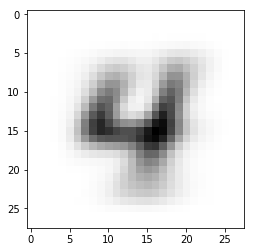

In [101]:
plt.imshow(mean_reshape[4], cmap='Greys')

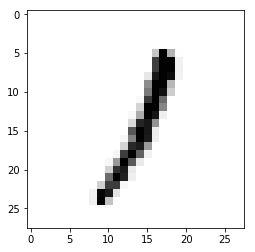

In [74]:
plt.imshow(x_train[99].reshape(28, 28), cmap='Greys')

In [105]:
print(np.max(weighted_distance))
print(np.min(weighted_distance))
print(np.average(weighted_distance))
print(np.std(weighted_distance))

20825.76236864484
8.429335128387413
331.853058565881
1257.0510922716257


In [97]:
out = output_membership_function(10, weighted_distance)
print(np.max(out))
print(np.min(out))

0.9723639801986645
5.764155498128668e-06


In [106]:
print(np.average(out))
print(np.std(out))

0.5068042982189376
0.3366048067187018
